In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PLUME_function import *
import seaborn as sns
%matplotlib inline

## Data importing

In [2]:
Xtrain,Ytrain,Xtest,VarNames = DataImporting()

## Creation of the train & test data.

In [187]:
date_train_list = sorted(list(set([DataSample(Xtrain,"NO2",keep_date= True).date.values[i].split(' ')[0] for i in range(4031)])))

In [245]:
#date_train_list

In [196]:
start = '2015-03-08'
end = '2015-04-05'
date_train_list.index(end) - date_train_list.index(start)

28

Alors, on va prendre 21 jours pour l'apprendissage et 8 jours pour le test.

In [210]:
date_train_end = [date_train_list[i] for i in range(20,len(date_train_list),29)]
date_train_start = [date_train_list[i] for i in range(0,len(date_train_list),29)]
print date_train_start
print date_train_end
date_test_end = [date_train_list[i] for i in range(28,len(date_train_list),29)]
date_test_start = [date_train_list[i] for i in range(21,len(date_train_list),29)]
print date_test_start
print date_test_end

['2015-01-28', '2015-03-08', '2015-04-16', '2015-05-25', '2015-07-03', '2015-08-11']
['2015-02-17', '2015-03-28', '2015-05-06', '2015-06-14', '2015-07-23', '2015-08-31']
['2015-02-18', '2015-03-29', '2015-05-07', '2015-06-15', '2015-07-24', '2015-09-01']
['2015-02-25', '2015-04-05', '2015-05-14', '2015-06-22', '2015-07-31', '2015-09-08']


In [ ]:
for bloc in range(5):
    for i in range(len(Xtrain)):
        
        

In [253]:
date_pds =[Xtrain.date.values[i].split(' ')[0] for i in range(len(Xtrain))]
bloc = 0
def TestDataSpliter(data,bloc,type = "train"):
    train_index = [i for i in range(len(Xtrain)) if date_pds[i]>=date_train_start[bloc] and date_pds[i]<=date_train_end[bloc] ]
    test_index = [i for i in range(len(Xtrain)) if date_pds[i]>=date_test_start[bloc] and date_pds[i]<=date_test_end[bloc] ]
    if type == "train":
        return data.iloc[train_index,:]
    if type == "test":
        return data.iloc[test_index,:]
TestDataSpliter(Xtrain,bloc = 0,type = "test").head()

,date,hour,day,month,isPublicHollyday,isPublicHollyday_-24,isPublicHollyday_+24,isSundayOrPublicHollyday,isSundayOrPublicHollyday_-24,isSundayOrPublicHollyday_+24,...,PM10_04034_-9,PM10_04034_-8,PM10_04034_-7,PM10_04034_-6,PM10_04034_-5,PM10_04034_-4,PM10_04034_-3,PM10_04034_-2,PM10_04034_-1,PM10_04034_0
501,2015-02-18 00,0,2,2,0,0,0,0,0,0,...,19,26,30,28,25,23,20,17,18,19
502,2015-02-18 01,1,2,2,0,0,0,0,0,0,...,26,30,28,25,23,20,17,18,19,22
503,2015-02-18 02,2,2,2,0,0,0,0,0,0,...,30,28,25,23,20,17,18,19,22,26
504,2015-02-18 03,3,2,2,0,0,0,0,0,0,...,28,25,23,20,17,18,19,22,26,29
505,2015-02-18 04,4,2,2,0,0,0,0,0,0,...,25,23,20,17,18,19,22,26,29,29


In [218]:
date_train_start[0]

'2015-01-28'

In [254]:
X_bloc0 = TestDataSpliter(Xtrain,bloc = 0,type = "test")
X_bloc1 = TestDataSpliter(Xtrain,bloc = 1,type = "test")
X_bloc2 = TestDataSpliter(Xtrain,bloc = 2,type = "test")
X_bloc3 = TestDataSpliter(Xtrain,bloc = 3,type = "test")
X_bloc4 = TestDataSpliter(Xtrain,bloc = 4,type = "test")
X_bloc5 = TestDataSpliter(Xtrain,bloc = 5,type = "test")
X_train_test = pd.concat([X_bloc0,X_bloc1,X_bloc2,X_bloc3,X_bloc4,X_bloc5], axis=0)
X_bloc0 = TestDataSpliter(Xtrain,bloc = 0,type = "train")
X_bloc1 = TestDataSpliter(Xtrain,bloc = 1,type = "train")
X_bloc2 = TestDataSpliter(Xtrain,bloc = 2,type = "train")
X_bloc3 = TestDataSpliter(Xtrain,bloc = 3,type = "train")
X_bloc4 = TestDataSpliter(Xtrain,bloc = 4,type = "train")
X_bloc5 = TestDataSpliter(Xtrain,bloc = 5,type = "train")
X_train_train = pd.concat([X_bloc0,X_bloc1,X_bloc2,X_bloc3,X_bloc4,X_bloc5], axis=0)

In [263]:
Y_bloc0 = TestDataSpliter(Ytrain,bloc = 0,type = "test")
Y_bloc1 = TestDataSpliter(Ytrain,bloc = 1,type = "test")
Y_bloc2 = TestDataSpliter(Ytrain,bloc = 2,type = "test")
Y_bloc3 = TestDataSpliter(Ytrain,bloc = 3,type = "test")
Y_bloc4 = TestDataSpliter(Ytrain,bloc = 4,type = "test")
Y_bloc5 = TestDataSpliter(Ytrain,bloc = 5,type = "test")
Y_train_test = pd.concat([Y_bloc0,Y_bloc1,Y_bloc2,Y_bloc3,Y_bloc4,Y_bloc5], axis=0)
Y_bloc0 = TestDataSpliter(Ytrain,bloc = 0,type = "train")
Y_bloc1 = TestDataSpliter(Ytrain,bloc = 1,type = "train")
Y_bloc2 = TestDataSpliter(Ytrain,bloc = 2,type = "train")
Y_bloc3 = TestDataSpliter(Ytrain,bloc = 3,type = "train")
Y_bloc4 = TestDataSpliter(Ytrain,bloc = 4,type = "train")
Y_bloc5 = TestDataSpliter(Ytrain,bloc = 5,type = "train")
Y_train_train = pd.concat([Y_bloc0,Y_bloc1,Y_bloc2,Y_bloc3,Y_bloc4,Y_bloc5], axis=0)

In [258]:
X_train_test.head()

,date,hour,day,month,isPublicHollyday,isPublicHollyday_-24,isPublicHollyday_+24,isSundayOrPublicHollyday,isSundayOrPublicHollyday_-24,isSundayOrPublicHollyday_+24,...,PM10_04034_-9,PM10_04034_-8,PM10_04034_-7,PM10_04034_-6,PM10_04034_-5,PM10_04034_-4,PM10_04034_-3,PM10_04034_-2,PM10_04034_-1,PM10_04034_0
501,2015-02-18 00,0,2,2,0,0,0,0,0,0,...,19,26,30,28,25,23,20,17,18,19
502,2015-02-18 01,1,2,2,0,0,0,0,0,0,...,26,30,28,25,23,20,17,18,19,22
503,2015-02-18 02,2,2,2,0,0,0,0,0,0,...,30,28,25,23,20,17,18,19,22,26
504,2015-02-18 03,3,2,2,0,0,0,0,0,0,...,28,25,23,20,17,18,19,22,26,29
505,2015-02-18 04,4,2,2,0,0,0,0,0,0,...,25,23,20,17,18,19,22,26,29,29


In [260]:
X_train_train.head()

,date,hour,day,month,isPublicHollyday,isPublicHollyday_-24,isPublicHollyday_+24,isSundayOrPublicHollyday,isSundayOrPublicHollyday_-24,isSundayOrPublicHollyday_+24,...,PM10_04034_-9,PM10_04034_-8,PM10_04034_-7,PM10_04034_-6,PM10_04034_-5,PM10_04034_-4,PM10_04034_-3,PM10_04034_-2,PM10_04034_-1,PM10_04034_0
0,2015-01-28 03,3,2,1,0,0,0,0,0,0,...,23,29.00,31.00,28.00,26.00,24.25,19.428581,19.412934,19,20
1,2015-01-28 04,4,2,1,0,0,0,0,0,0,...,29,31.00,28.00,26.00,24.25,22.50,19.428581,19.000000,20,20
2,2015-01-28 05,5,2,1,0,0,0,0,0,0,...,31,28.00,26.00,24.25,22.50,20.75,19.000000,20.000000,20,20
3,2015-01-28 06,6,2,1,0,0,0,0,0,0,...,28,26.00,24.25,22.50,20.75,19.00,20.000000,20.000000,20,18
4,2015-01-28 07,7,2,1,0,0,0,0,0,0,...,26,24.25,22.50,20.75,19.00,20.00,20.000000,20.000000,18,15


In [268]:
print np.shape(Y_train_train)
print np.shape(X_train_train)
print np.shape(Y_train_test)
print np.shape(X_train_test)

(3011, 96)
(3011, 3729)
(1020, 96)
(1020, 3729)


## Save train_test data

In [262]:
X_train_train.to_csv('sample data/' + "X_train_train.csv" ,sep = ',',header = True, index = False,encoding ='utf-8')
X_train_test.to_csv('sample data/' + "X_train_test.csv" ,sep = ',',header = True, index = False,encoding ='utf-8')

In [269]:
Y_train_train.to_csv('sample data/' + "Y_train_train.csv" ,sep = ',',header = True, index = False,encoding ='utf-8')
Y_train_test.to_csv('sample data/' + "Y_train_test.csv" ,sep = ',',header = True, index = False,encoding ='utf-8')

## Lasso

In [277]:
X_NO2_train = DataSample(X_train_train,"NO2")
X_O3_train = DataSample(X_train_train,"O3")
#X = pd.DataFrame({X_NO2,X_O3})
X_train = pd.concat([X_NO2_train, X_O3_train], axis=1)
Y_train = DataSample(Y_train_train,"NO2").values

X_NO2_test = DataSample(X_train_test,"NO2")
X_O3_test = DataSample(X_train_test,"O3")
#X = pd.DataFrame({X_NO2,X_O3})
X_test = pd.concat([X_NO2_test, X_O3_test], axis=1)
Y_test = DataSample(Y_train_test,"NO2").values
#print np.shape(Y)

(3011, 24)


In [340]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=10)
clf.fit(Y_train, X_train)



Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

(array([   6.,   26.,   41.,  214.,  120.,   69.,   26.,    9.,    8.,    6.]),
 array([-0.60235775, -0.44737384, -0.29238993, -0.13740602,  0.01757789,
         0.1725618 ,  0.32754571,  0.48252962,  0.63751353,  0.79249744,
         0.94748135]),
 <a list of 10 Patch objects>)

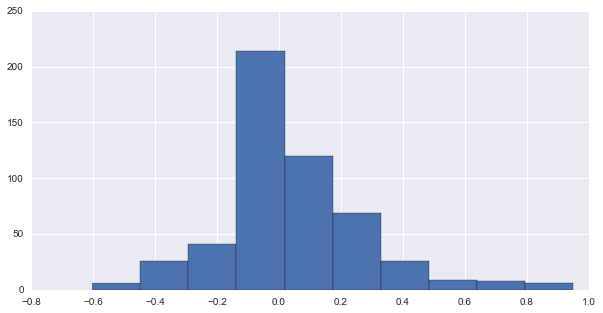

In [341]:
plt.figure(figsize = [10,5])
hour = 1
plt.hist([clf.coef_[i][hour-1] for i in range(np.shape(clf.coef_)[0])], bins = 10)
#print(clf.intercept_)
#[int(clf.coef_[i][1]!=0) for i in range(np.shape(clf.coef_)[0])]



In [342]:
Xtrain.iloc[[int(clf.coef_[i][1]!=0) for i in range(np.shape(clf.coef_)[0])]].head()

,date,hour,day,month,isPublicHollyday,isPublicHollyday_-24,isPublicHollyday_+24,isSundayOrPublicHollyday,isSundayOrPublicHollyday_-24,isSundayOrPublicHollyday_+24,...,PM10_04034_-9,PM10_04034_-8,PM10_04034_-7,PM10_04034_-6,PM10_04034_-5,PM10_04034_-4,PM10_04034_-3,PM10_04034_-2,PM10_04034_-1,PM10_04034_0
0,2015-01-28 03,3,2,1,0,0,0,0,0,0,...,23,29,31,28,26.00,24.25,19.428581,19.412934,19,20
1,2015-01-28 04,4,2,1,0,0,0,0,0,0,...,29,31,28,26,24.25,22.50,19.428581,19.000000,20,20
1,2015-01-28 04,4,2,1,0,0,0,0,0,0,...,29,31,28,26,24.25,22.50,19.428581,19.000000,20,20
1,2015-01-28 04,4,2,1,0,0,0,0,0,0,...,29,31,28,26,24.25,22.50,19.428581,19.000000,20,20
0,2015-01-28 03,3,2,1,0,0,0,0,0,0,...,23,29,31,28,26.00,24.25,19.428581,19.412934,19,20


In [375]:
hour = 10
a=pd.Series([int(clf.coef_[i][hour-1]!=0) for i in range(np.shape(clf.coef_)[0])])

X_lasso = X_train.loc[:,a.values != 0]
Y_hour = Y_train[:,hour-1]
X_lasso_test = X_test.loc[:,a.values != 0]
Y_hour_test = Y_test[:,hour-1]


In [376]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_lasso,Y_hour)
MSE = np.mean((Y_hour_test - lm.predict(X_lasso_test)) ** 2)
R2 = lm.score(X_lasso_test,Y_hour_test)
print 'MSE = ' + str(MSE) + '\n'
print 'R2 = ' + str(R2) + '\n'

MSE = 210.588975928

R2 = 0.211640092507



In [377]:
lm = linear_model.LinearRegression()
lm.fit(X_train,Y_hour)
MSE = np.mean((Y_hour_test - lm.predict(X_test)) ** 2)
R2 = lm.score(X_test,Y_hour_test)
print 'MSE = ' + str(MSE) + '\n'
print 'R2 = ' + str(R2) + '\n'

MSE = 234.850552579

R2 = 0.120814567382



In [378]:
print np.shape(X_train)[1]
print np.shape(X_lasso)[1]

525
174
